In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path('./Resources/lending_data.csv')
df_lending = pd.read_csv(file_path)

# Review the DataFrame
df_lending.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_lending['loan_status']

# Separate the X variable, the features
X = df_lending.drop(columns='loan_status')

In [4]:
# Review the y variable Series -- 1st 5 rows
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame -- 1st 5 rows
X[:5]

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
df_lending['loan_status'].value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)

# Fit (Train) the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)

print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Testing Data Score: 0.9924164259182832


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Print the balanced_accuracy score of the model
# first calculate balanced accuracy score
bal_acc_score = balanced_accuracy_score(y_test, predictions)

print(f"Balanced Accuracy Score: {bal_acc_score}")

Balanced Accuracy Score: 0.9442676901753825


In [11]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions)

array([[18679,    80],
       [   67,   558]])

In [12]:
# Print the classification report for the model
target_names = ['0 (healthy loan)', '1 (high-risk loan)']
print(classification_report(y_test, predictions, target_names=target_names))

                    precision    recall  f1-score   support

  0 (healthy loan)       1.00      1.00      1.00     18759
1 (high-risk loan)       0.87      0.89      0.88       625

          accuracy                           0.99     19384
         macro avg       0.94      0.94      0.94     19384
      weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

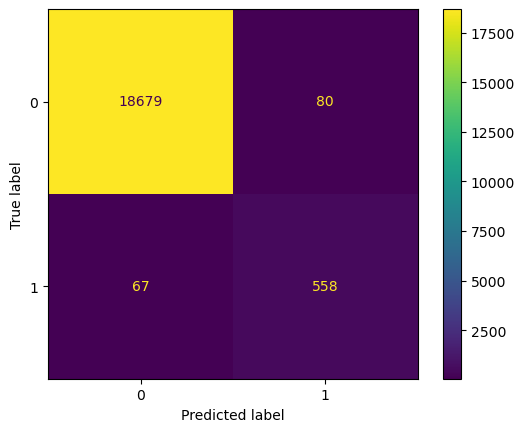

In [13]:
# Confusion Matrix Display to provide additional visual for following question
query_cm = confusion_matrix(y_test, predictions)
display = confusion_matrix(y_test, predictions, labels=classifier.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=query_cm, display_labels=classifier.classes_)
display.plot()

plt.show()

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** There are a lot less samples of 'high-risk loan', more samples could allow us to train the model to be more accurate. Overall, this suggests the model is performing well in terms of accuracy, but there could be room for improvement in recall instances.

---

### Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame for the new model.

In [15]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
csv_path = Path('./Resources/lending_data.csv')
df_data = pd.read_csv(file_path)

# Review the DataFrame
df_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


###  Define the target vector (`y`)  from the “loan_status” column, and then define the features (`X`) DataFrame from the remaining columns.

In [16]:
# Define features set
X = df_data.copy()
X.drop('loan_status', axis=1, inplace=True)
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [17]:
# Define target vector
y = df_data['loan_status'].ravel()
y[:5]

array([0, 0, 0, 0, 0])

###  Split the data into training and testing datasets by using `train_test_split`.

In [18]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
# note: using many of the same parameters from challenge for comparison consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

###   Run StandardScaler

In [19]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [20]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [21]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

###   Fitting a Random Forest Model

In [22]:
# Create a random forest classifier
# note: changing the random state to 1 only to keep results consistent
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [23]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

###  Making Predictions using the Random Forest Model

In [24]:
# Making predictions using the 'X' testing data
predict_rf = rf_model.predict(X_test_scaled)

###  Model Evaluation

In [25]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predict_rf)
cm_df = pd.DataFrame(
    cm, index=['0 healthy loan', '1 high-risk loan'], columns=['Predicted 0', 'Predicted 1']
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predict_rf)

In [26]:
# Displaying results
print('Confusion Matrix')
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print('Classification Report')
print(classification_report(y_test, predict_rf))

Confusion Matrix


,Predicted 0,Predicted 1
0 healthy loan,18680,79
1 high-risk loan,72,553


Accuracy Score : 0.9922100701609575
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.88      0.88      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



###  Feature Importance

In [27]:
# Random Forests in sklearn will automatically calculate feature importance
importance = rf_model.feature_importances_

# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2856517805087359, 'interest_rate'),
 (0.18217568289246236, 'borrower_income'),
 (0.17161259891769354, 'debt_to_income'),
 (0.16256482001289166, 'total_debt'),
 (0.12244025118943648, 'loan_size'),
 (0.07543498689330673, 'num_of_accounts'),
 (0.00011987958547331872, 'derogatory_marks')]

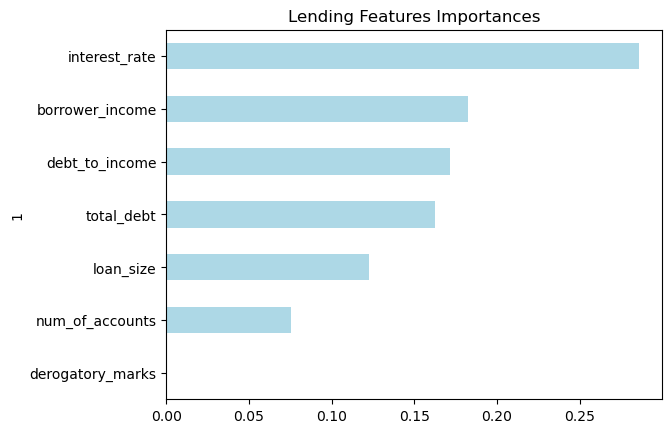

In [28]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightblue', title= 'Lending Features Importances', legend=False)

plt.show()